In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import geopandas as gpd
import geobr
import seaborn as sns
sns.set(style="white")

In [2]:
sys.path.append('..')

In [3]:
df_18 = pd.read_csv('../Data/processed/EXANBR18.csv')
df_19 = pd.read_csv('../Data/processed/EXANBR19.csv')
df_20 = pd.read_csv('../Data/processed/EXANBR20.csv')

C:\Users\denis\AppData\Local\Temp\ipykernel_2064\3890119570.py:1: DtypeWarning: Columns (26,29,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_18 = pd.read_csv('../Data/processed/EXANBR18.csv')


In [4]:
df = pd.concat([df_18,df_19,df_20])

In [5]:
df = df[df['DT_SIN_PRI'] >= '2018-01-01']

In [6]:
df_first_symp = df.groupby(['ID_MN_RESI'])['DT_SIN_PRI'].min()

In [7]:
df_first_symp = df_first_symp.reset_index()

In [8]:
df_first_symp

,ID_MN_RESI,DT_SIN_PRI
0,110004.0,2019-11-06
1,110012.0,2018-07-09
2,110020.0,2018-06-11
3,110030.0,2020-01-18
4,120040.0,2018-06-23
...,...,...
843,521210.0,2019-09-05
844,521250.0,2019-08-14
845,521830.0,2019-08-11
846,521860.0,2020-02-25


In [9]:
map_br = geobr.read_municipality()

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-p

In [10]:
map_br['code_muni'] = map_br['code_muni'].astype(str).str[:6].astype(int)

In [11]:
map_br = map_br.merge(df_first_symp, how = 'left', left_on = 'code_muni', right_on = 'ID_MN_RESI')

In [12]:
map_br['DT_SIN_PRI'] = pd.to_datetime(map_br['DT_SIN_PRI'])

In [13]:
map_br['DT_SIN_PRI_DIFF'] = map_br['DT_SIN_PRI'] - min(map_br[-map_br['DT_SIN_PRI'].isnull()]['DT_SIN_PRI'])

In [14]:
map_br['DT_SIN_PRI_DIFF'] = map_br['DT_SIN_PRI_DIFF'].dt.days

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coord

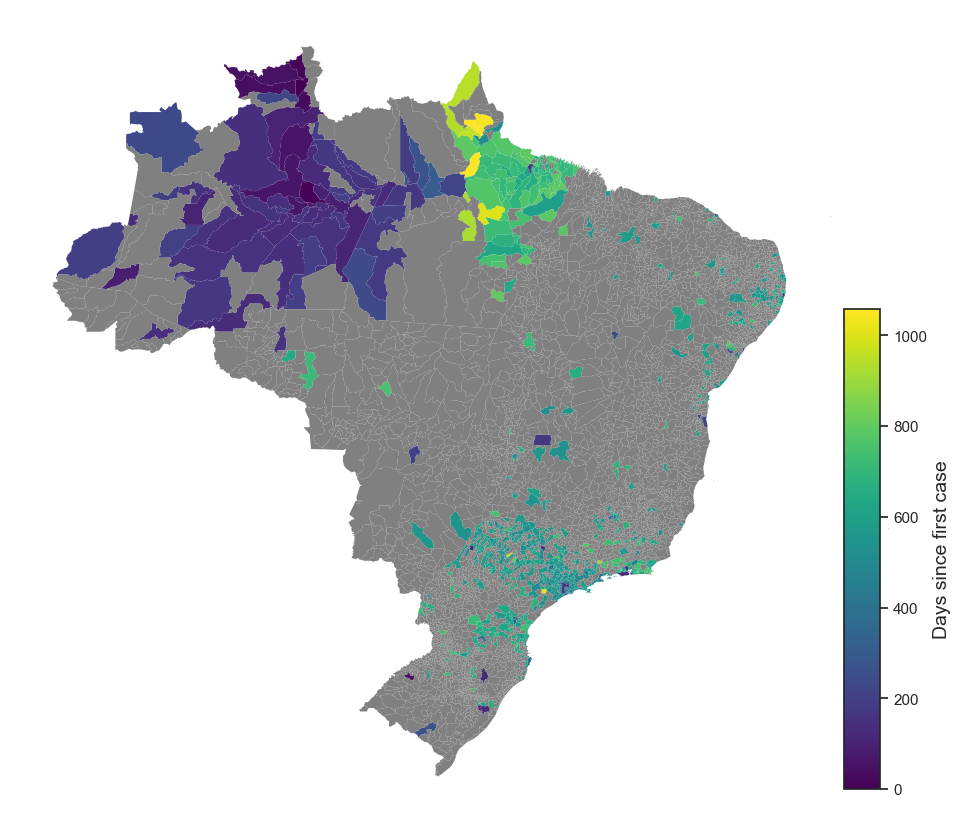

In [15]:
missing_kwds = dict(color='grey', label='No Data')

fig, axs = plt.subplots(figsize = (12,12))

map_br.plot(
        ax=axs, 
        column='DT_SIN_PRI_DIFF', 
        missing_kwds=missing_kwds,
        linewidth=0.0,
        cmap = 'viridis'
    )


cax = fig.add_axes(
        [
            0.82,    # posicao x (entre 0.0 e 1.0)
            0.18,    # posicao y (entre 0.0 e 1.0)
            0.03,    # largura x
            0.40,    # altura y
        ]
    )

sm = plt.cm.ScalarMappable(
        cmap="viridis",                                       
        norm=plt.Normalize(
            vmin=map_br["DT_SIN_PRI_DIFF"].min(),  
            vmax=map_br["DT_SIN_PRI_DIFF"].max(),  
        ),
    )
    
fig.colorbar(
    sm,
    cax=cax)

#axs.set_title(
 #   "Date of symptom onset of first case of Measles per municipality",
 #  fontdict={"fontsize": 15},
 #   )
cax.set_ylabel('Days since first case', rotation=90, fontsize = 14)

axs.axis("off") 
plt.savefig('../Figs/first_symptoms_map.pdf',bbox_inches='tight')

In [16]:
map_br_norte = map_br[map_br['abbrev_state'].isin(['AM','PA','AC','RR','RO','AP','TO'])]
#map_br_norte = map_br[map_br['abbrev_state'].isin(['AM','AC','RR','RO','TO'])]

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coord

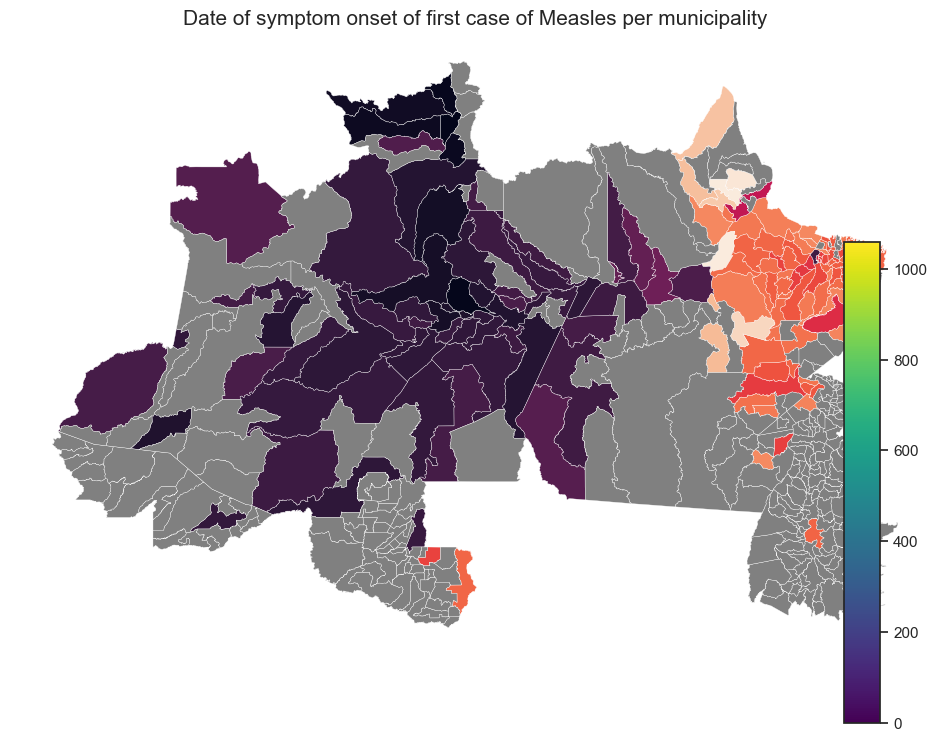

In [17]:
missing_kwds = dict(color='grey', label='No Data')

fig, axs = plt.subplots(figsize = (12,12))

map_br_norte.plot(
        ax=axs, 
        column='DT_SIN_PRI_DIFF', 
        missing_kwds=missing_kwds,
        linewidth=0.25
    )


cax = fig.add_axes(
        [
            0.82,    # posicao x (entre 0.0 e 1.0)
            0.18,    # posicao y (entre 0.0 e 1.0)
            0.03,    # largura x
            0.40,    # altura y
        ]
    )

sm = plt.cm.ScalarMappable(
        cmap="viridis",                                       
        norm=plt.Normalize(
            vmin=map_br_norte["DT_SIN_PRI_DIFF"].min(),  
            vmax=map_br_norte["DT_SIN_PRI_DIFF"].max(),  
        ),
    )
    
fig.colorbar(
    sm,
    cax=cax)

axs.set_title(
    "Date of symptom onset of first case of Measles per municipality",
    fontdict={"fontsize": 15},
    )

axs.axis("off") 
plt.savefig('../Figs/first_symptoms_map_north.pdf')